In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Ice Cream Sales - temperatures.csv')
df.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [14]:
df.shape

(365, 2)

In [15]:
df.describe

<bound method NDFrame.describe of      Temperature  Ice Cream Profits
0             39              13.17
1             40              11.88
2             41              18.82
3             42              18.65
4             43              17.02
..           ...                ...
360           99              85.13
361           99              87.08
362           99              89.29
363          101              81.91
364          101              85.02

[365 rows x 2 columns]>

In [16]:
df.info

<bound method DataFrame.info of      Temperature  Ice Cream Profits
0             39              13.17
1             40              11.88
2             41              18.82
3             42              18.65
4             43              17.02
..           ...                ...
360           99              85.13
361           99              87.08
362           99              89.29
363          101              81.91
364          101              85.02

[365 rows x 2 columns]>

In [20]:
x = df['Temperature']
y = df['Ice Cream Profits']

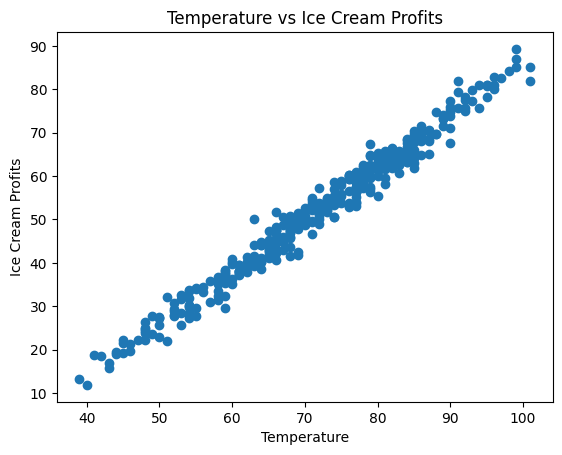

In [22]:
plt.scatter(x,y) # create scatter plot
plt.title("Temperature vs Ice Cream Profits")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

In [28]:
# standardise features
scaler = StandardScaler()
# Convert to numpy array first to apply np.newaxis
x_scaled = scaler.fit_transform(np.array(x)[:,np.newaxis])

# Train test split
x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=6)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [31]:
# Get predictions
y_pred = RF.predict(x_test)

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 2.4438669207345223


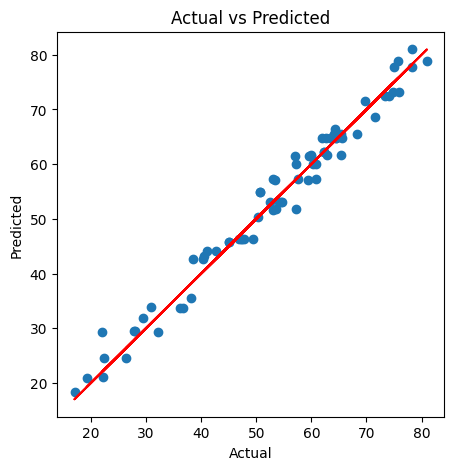

In [32]:
f, ax = plt.subplots(figsize=(5,5))

# Plot actual vs. predicted values on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

In [33]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [34]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [35]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [36]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

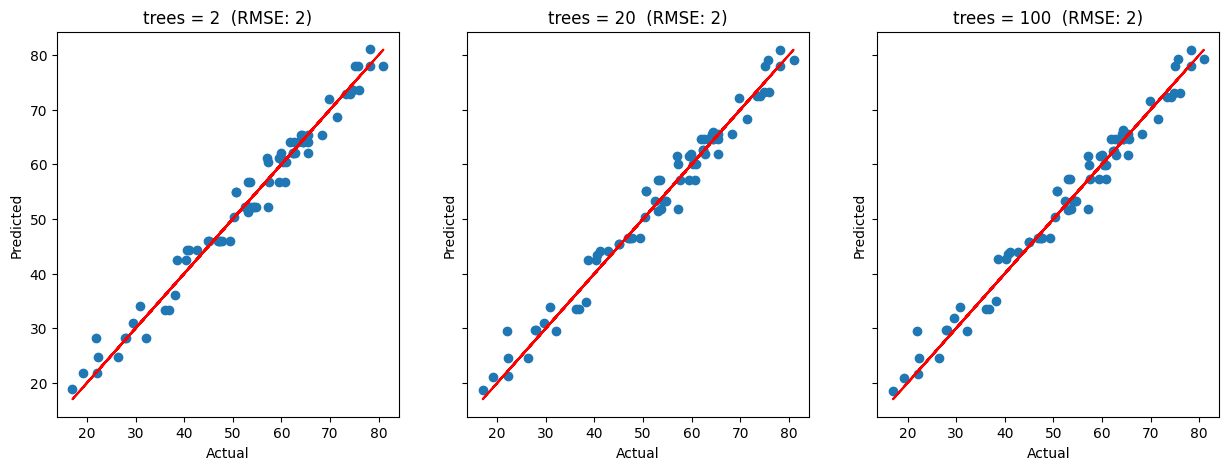

In [37]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])